# Sortieralgorithmen

Ich habe mich neulich gefragt, was es für gängige Sortieralgorithmen gibt. Wie funktionieren sie? Wie schnell sind sie? Gibt es koriose Algorithmen usw.
Was ich dabei gelernt habe, möchte ich hier teilen. Ich werde verschiedene Algorithmen in Python umsetzen und versuchen den Vorgang grafisch darszustellen.
Dazu brauche ich zunächst einen Datensatz.

## Der zu sortierende Datensatz

Es wird ein einfacher Datensatz sein, den man hoffentlich gut visualisieren kann. Und zwar eine gewisse Anzahl von Integerwerten, die jedes Mal gleich randomisiert sein sollten.

In [30]:
# Zunächst werden alle benötigten Bibliotheken importiert
import matplotlib.pyplot as plt
import random
import matplotlib.cm as cm
import os
import time

# Random Seed setzen
random.seed(42)

In [31]:
# Anzahl der ELemente im Datensatz
n = 10

# Datensatz generieren
dataset = random.sample(range(1, n+1), n)

In [32]:
dataset

[2, 1, 5, 10, 7, 6, 9, 3, 4, 8]

Dann definieren eine Funktion die wir noch häufiger einsetzen werden, um das Sortieren zu visualisieren.

In [33]:
# Farbverlaufsfunktion
cmap = cm.get_cmap('YlGnBu')  # Farbverlauf von Gelb über Grün zu Blau

# Funktion zum Aktualisieren des Balkendiagramms
def update_chart(data, iteration, xlim, ylim, folder_name, name = "Dataset",):
    i = len(data)
    colors = [cmap(x/i) for x in data]
    plt.bar(range(1, i+1), data, color=colors)
    plt.xlim(xlim)
    plt.ylim(ylim)
    plt.xticks([])
    plt.yticks([])
    
    if not os.path.exists(folder_name):
      os.makedirs(folder_name)

    if name == "Start":
      plt.title(f'Startkonfiguration')
      plt.savefig(f'{folder_name}/{name}.png')
    else:
      plt.title(f'Sortierung {name} - Schritt {iteration}')
      plt.savefig(f'{folder_name}/{name}_Iteration_{iteration:04d}.png')  # Speichere den Plot als PNG-Datei
    
    plt.close()

C:\Users\gutsc\AppData\Local\Temp\ipykernel_56268\3632522788.py:2: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = cm.get_cmap('YlGnBu')  # Farbverlauf von Gelb über Grün zu Blau


In [34]:
update_chart(dataset, 1, xlim=[0, n+1], ylim=[0, n+.5], folder_name="Sortieralgorithmen", name="Start")

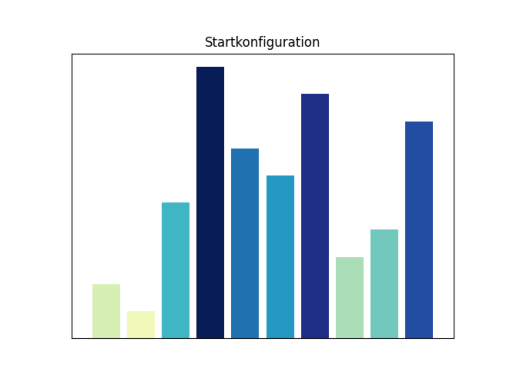

In [35]:

# Load the image
image = plt.imread('Sortieralgorithmen/Start.png')

# Show the image
plt.imshow(image)
plt.axis('off')
plt.show()

## Sortieralgorithmen

Im folgenden werde ich ein paar Sortieralgorithmen vorstellen, die so weit ich weiß, zu den gängigsten gehören. Ich werde zu jedem Algorithmus ein paar Worte verlieren und den Algorithmus anschließend implementieren. Da ich das Sortieren auch visualisieren möchte, werde ich ein paar zusätzliche, für den Algorithmus unnötige Zeilen programmieren. Ich habe versucht das alles konsistent zu halten, aber weil dieser Beitrag mit einigen Pausen entstanden ist, gibt es hier und da vermutlich ein paar Ausreißer. 

### Bubble Sort

Bubble Sort ist ein einfacher Vergleichssortieralgorithmus, der wiederholt benachbarte Elemente vergleicht und sie vertauscht, wenn sie in der falschen Reihenfolge sind. Dieser Prozess wird so lange fortgesetzt, bis keine Vertauschungen mehr nötig sind, was bedeutet, dass das Array sortiert ist. Der Name "Bubble Sort" kommt daher, dass kleinere Elemente wie Blasen im Wasser nach oben steigen, genau wie die zu sortierenden Elemente aufsteigen.
* **Funktionsweise**: In jedem Durchlauf wird das Array von Anfang bis Ende durchlaufen. Dabei werden jeweils zwei benachbarte Elemente verglichen. Wenn das linke Element größer ist als das rechte, werden sie vertauscht. Am Ende des ersten Durchlaufs befindet sich das größte Element am Ende des Arrays. Im zweiten Durchlauf wird das zweitgrößte Element gefunden und so weiter.
* **Zeitkomplexität**: $O(n²)$ im Durchschnitt und im schlimmsten Fall. Das bedeutet, dass die Anzahl der Vergleiche und Vertauschungen quadratisch mit der Anzahl der Elemente im Array zunimmt. Für große Datensätze wird Bubble Sort daher sehr langsam.
* **Besonderheiten**: Bubble Sort ist einfach zu verstehen und zu implementieren, aber ineffizient für große Datensätze. Er ist ein stabiler Sortieralgorithmus, d.h., die relative Reihenfolge gleicher Elemente bleibt erhalten.

In [36]:
def bubble_sort(data):
    def swap(i, j):
        """Vertauscht die Elemente an den Positionen i und j."""
        data[i], data[j] = data[j], data[i]  # Tausche die Elemente an den Positionen i und j

    sorted_datasets = []  # Initialisiere eine leere Liste, um die sortierten Datensätze zu speichern
    n = len(data)  # Die Anzahl der Elemente im Datensatz
    for i in range(n):  # Für jedes Element im Datensatz
        for j in range(0, n-i-1):  # Für jedes Element, das noch nicht sortiert ist
            if data[j] > data[j+1]:  # Wenn das aktuelle Element größer als das nächste Element ist
                swap(j, j+1)  # Tausche die beiden Elemente
            sorted_datasets.append(data[:])  # Speichere den aktuellen Zustand des Datensatzes
    return sorted_datasets  # Gib die Liste der sortierten Datensätze zurück

In [37]:
_ = bubble_sort(dataset)

In [38]:
for i, data in enumerate(bubble_sort(dataset)):
    update_chart(data, i+1,  xlim=[0, n+1], ylim=[0, n+.5], folder_name="Sortieralgorithmen/bubble_sort", name="Bubble Sort")

### Insertion Sort

Insertion Sort baut das sortierte Array schrittweise auf, indem er jedes Element aus dem unsortierten Teil nimmt und es an der richtigen Stelle im sortierten Teil einfügt.
* **Funktionsweise**: Der Algorithmus beginnt mit dem zweiten Element und vergleicht es mit dem ersten Element. Wenn es kleiner ist, wird es vor dem ersten Element eingefügt. Dann wird das dritte Element genommen und mit den beiden ersten verglichen und so weiter. Am Ende jedes Schritts ist der linke Teil des Arrays sortiert.
* **Zeitkomplexität**: $O(n²)$ im Durchschnitt und im schlimmsten Fall, aber effizienter als Bubble Sort für teilweise sortierte Daten. Bei fast sortierten Arrays nähert sich die Zeitkomplexität $O(n)$.
* **Besonderheiten**: Insertion Sort ist ein In-place-Algorithmus, d.h., er benötigt keinen zusätzlichen Speicherplatz. Er ist einfach zu implementieren und effizient für kleine Datensätze oder fast sortierte Daten.

In [39]:
# Erzeuge einen zufälligen Datensatz
n = 10
dataset = random.sample(range(1, n+1), n)

In [40]:
def insertion_sort(data):
    def insert(j, key):
        """Verschiebt Elemente nach rechts und fügt das Schlüsselelement an der richtigen Position ein."""
        while j >= 0 and data[j] > key:  # Solange wir nicht am Anfang des Arrays sind und das aktuelle Element größer als das Schlüsselelement ist
            data[j+1] = data[j]  # Verschiebe das aktuelle Element nach rechts
            j -= 1  # Gehe zum nächsten Element auf der linken Seite
        data[j+1] = key  # Füge das Schlüsselelement an der richtigen Position ein

    sorted_datasets = []  # Initialisiere eine leere Liste, um die sortierten Datensätze zu speichern
    for i in range(1, len(data)):  # Starte bei der zweiten Position im Array
        insert(i - 1, data[i])  # Füge das Element `data[i]` an der richtigen Position ein
        sorted_datasets.append(data[:])  # Speichere den aktuellen Zustand des Arrays
    return sorted_datasets  # Gib die Liste der sortierten Datensätze zurück

In [41]:
for i, data in enumerate(insertion_sort(dataset)):
    update_chart(data, i+1,  xlim=[0, n+1], ylim=[0, n+.5], folder_name="Sortieralgorithmen/insertion_sort", name="Insertion Sort")

### Selection Sort

Selection Sort findet in jedem Durchlauf das kleinste Element im unsortierten Teil des Arrays und tauscht es mit dem ersten Element des unsortierten Teils.
* **Funktionsweise**: Der Algorithmus durchläuft das Array und findet das kleinste Element. Dieses wird mit dem ersten Element vertauscht. Dann wird der Vorgang für den restlichen, unsortierten Teil des Arrays wiederholt.
* **Zeitkomplexität**: $O(n²)$ in allen Fällen. Die Anzahl der Vergleiche ist unabhängig von der Anordnung der Elemente immer gleich.
* **Besonderheiten**: Selection Sort ist einfach zu verstehen, aber ineffizient für große Datensätze. Er führt weniger Vertauschungen durch als Bubble Sort, was bei teuren Vertauschungsoperationen von Vorteil sein kann.

In [42]:
# Erzeuge einen zufälligen Datensatz
n = 10
dataset = random.sample(range(1, n+1), n)

In [43]:
def selection_sort(data):
    def find_min_index(start_index):
        """Findet den Index des kleinsten Elements ab dem gegebenen Startindex."""
        min_index = start_index
        for j in range(start_index+1, len(data)):
            if data[j] < data[min_index]:
                min_index = j
        return min_index

    sorted_datasets = []  # Initialisiere eine leere Liste, um die sortierten Datensätze zu speichern
    for i in range(len(data)-1):  # Für jedes Element im Datensatz, außer dem letzten
        min_index = find_min_index(i)  # Finde den Index des kleinsten Elements ab dem aktuellen Index
        data[i], data[min_index] = data[min_index], data[i]  # Tausche das aktuelle Element mit dem kleinsten Element
        sorted_datasets.append(data[:])  # Speichere den aktuellen Zustand des Datensatzes
    return sorted_datasets  # Gib die Liste der sortierten Datensätze zurück

In [44]:
for i, data in enumerate(selection_sort(dataset)):
    update_chart(data, i+1,  xlim=[0, n+1], ylim=[0, n+.5], folder_name="Sortieralgorithmen/selection_sort", name="Selection Sort")

### Merge Sort

Merge Sort ist ein "Teile und Herrsche"-Algorithmus, der das Array rekursiv in zwei Hälften teilt, jede Hälfte sortiert und dann die sortierten Hälften zusammenführt.
* **Funktionsweise**: Das Array wird solange halbiert, bis nur noch einzelne Elemente übrig sind. Diese sind trivialerweise sortiert. Dann werden die einzelnen Elemente zu sortierten Paaren zusammengeführt, dann Paare zu Vierergruppen und so weiter, bis das gesamte Array sortiert ist.
* **Zeitkomplexität**: $O(n \cdot log(n))$ in allen Fällen. Die Anzahl der Vergleiche wächst logarithmisch mit der Anzahl der Elemente, was ihn effizient für große Datensätze macht.
* **Besonderheiten**: Merge Sort ist ein stabiler Sortieralgorithmus und effizient für große Datensätze. Er benötigt jedoch zusätzlichen Speicherplatz für die temporären Arrays beim Zusammenführen.

In [45]:
# Erzeuge einen zufälligen Datensatz
dataset = random.sample(range(1, n+1), n)

In [46]:
import itertools

def merge_sort(data):
    steps = []  # Liste zur Speicherung der Zwischenschritte

    def merge(left, right, start):
        result = []  # Ergebnisliste
        i = j = 0  # Initialisiere die Indizes für die linke und rechte Liste
        # Durchlaufe beide Listen und füge das kleinere Element zur Ergebnisliste hinzu
        while i < len(left) and j < len(right):
            if left[i] < right[j]:
                result.append(left[i])
                i += 1
            else:
                result.append(right[j])
                j += 1
            # Aktualisiere den entsprechenden Teil des ursprünglichen Arrays und speichere den Schritt
            data[start:start+len(result)] = result
            steps.append(list(data))

        # Füge die verbleibenden Elemente von left oder right hinzu
        for value in itertools.chain(left[i:], right[j:]):
            result.append(value)
            data[start:start+len(result)] = result
            steps.append(list(data))

        return result  # Gib die sortierte Liste zurück

    def sort(data, start=0):
        if len(data) <= 1:  # Wenn die Liste nur ein Element enthält, ist sie bereits sortiert
            return data
        mid = len(data) // 2  # Finde den mittleren Index
        left = data[:mid]  # Teile die Liste in zwei Hälften
        right = data[mid:]
        # Sortiere beide Hälften und führe sie zusammen
        return merge(sort(left, start), sort(right, start + mid), start)

    sort(data)  # Starte den Sortierprozess
    return steps  # Gib die Liste der Zwischenschritte zurück

In [47]:
for i, data in enumerate(merge_sort(dataset)):
    update_chart(data, i+1,  xlim=[0, n+1], ylim=[0, n+.5], folder_name="Sortieralgorithmen/merge_sort", name="Merge Sort")

### Quick Sort

Quick Sort ist ein weiterer "Teile und Herrsche"-Algorithmus. Er wählt ein Element als "Pivot" und partitioniert das Array in zwei Teilbereiche: Elemente kleiner als das Pivot und Elemente größer als das Pivot. Anschließend werden die Teilbereiche rekursiv sortiert.
* **Funktionsweise**: Die Wahl des Pivots ist entscheidend für die Effizienz. Im Idealfall teilt das Pivot das Array in zwei gleich große Hälften. Im schlimmsten Fall ist das Pivot das kleinste oder größte Element, was zu einer Zeitkomplexität von $O(n²)$ führt.
* **Zeitkomplexität**: $O(n \cdot log(n))$ im Durchschnitt, $O(n²)$ im schlimmsten Fall (selten).
* **Besonderheiten**: Quick Sort ist ein In-place-Algorithmus und oft schneller als Merge Sort in der Praxis. Er ist jedoch nicht stabil.

In [48]:
# Erzeuge einen zufälligen Datensatz
dataset = random.sample(range(1, n+1), n)

In [49]:
def quick_sort_visualized(arr):
    snapshots = [arr[:]]  # Initialer Snapshot vor Beginn der Sortierung

    def _quick_sort(arr, low, high):
        if low < high:
            pivot_index = partition(arr, low, high)
            snapshots.append(arr[:])  # Snapshot nach jeder Swap-Operation
            _quick_sort(arr, low, pivot_index - 1)
            _quick_sort(arr, pivot_index + 1, high)

    def partition(arr, low, high):
        pivot = arr[high]
        i = low - 1
        # Durchlaufe das Array mit Index und Wert
        for j, value in enumerate(arr[low:high], low):
            if value <= pivot:
                i += 1
                arr[i], arr[j] = arr[j], arr[i]
                snapshots.append(arr[:])  # Snapshot nach jedem Swap
        arr[i + 1], arr[high] = arr[high], arr[i + 1]
        snapshots.append(arr[:])  # Snapshot nach dem finalen Swap
        return i + 1

    _quick_sort(arr, 0, len(arr) - 1)
    return snapshots

In [50]:
for i, data in enumerate(quick_sort_visualized(dataset)):
    update_chart(data, i+1,  xlim=[0, n+1], ylim=[0, n+.5], folder_name="Sortieralgorithmen/quick_sort", name="Quick Sort")

### Heap Sort

Heap Sort nutzt eine spezielle Datenstruktur namens Heap, um das Array zu sortieren. Ein Heap ist ein binärer Baum, in dem jeder Knoten größer (oder kleiner, je nach Implementierung) ist als seine Kinder.
* **Funktionsweise**: Der Heap Sort Algorithmus beginnt mit der Umwandlung des Arrays in einen Heap. Dann wird das größte Element (die Wurzel des Heaps) entfernt und an das Ende des Arrays gestellt. Dieser Prozess wird wiederholt, bis das gesamte Array sortiert ist. Nach jedem Entfernen wird der Heap wiederhergestellt, um die Heap-Eigenschaft zu erhalten.
* **Zeitkomplexität**: Die Zeitkomplexität von Heap Sort ist $O(n \cdot log(n))$ in allen Fällen. Dies liegt daran, dass das Erstellen des Heaps $O(n)$ Zeit benötigt und das Entfernen jedes Elements $O(log(n))$ Zeit benötigt.
* **Besonderheiten**: Heap Sort ist ein In-place-Algorithmus, was bedeutet, dass er keinen zusätzlichen Speicherplatz benötigt. Er garantiert eine Zeitkomplexität von $O(n \cdot log(n))$, unabhängig von der Anordnung der Elemente. Ein Nachteil von Heap Sort ist, dass er komplexer zu implementieren ist als andere Sortieralgorithmen wie Quick Sort oder Merge Sort.

In [69]:
# Erzeuge einen zufälligen Datensatz
n = 50
dataset = random.sample(range(1, n+1), n)

In [70]:
def heapify(arr, n, i, snapshots):
    """
    Hilfsfunktion, um den Heap an der Position i wiederherzustellen.
    """
    largest = i  # Größtes Element initialisieren

    # Überprüfen, ob das linke oder rechte Kind größer ist als die Wurzel
    for j in [2 * i + 1, 2 * i + 2]:  # j ist das linke und dann das rechte Kind
        if j < n and arr[largest] < arr[j]:
            largest = j

    # Wenn das größte Element nicht die Wurzel ist, tauschen und rekursiv heapify aufrufen
    if largest != i:
        arr[i], arr[largest] = arr[largest], arr[i]
        snapshots.append(arr.copy())  # Snapshot speichern
        heapify(arr, n, largest, snapshots)

def heap_sort(arr):
    """
    Implementiert Heap Sort und gibt eine Liste von Arrays zurück,
    die den Sortierverlauf darstellen.
    """
    n = len(arr)
    snapshots = [arr.copy()]  # Initialen Zustand speichern

    # Heap erstellen (Bottom-up)
    for i in range(n // 2 - 1, -1, -1):
        heapify(arr, n, i, snapshots)

    # Ein Element nach dem anderen aus dem Heap entfernen und an die richtige Stelle setzen
    for i in range(n - 1, 0, -1):
        arr[i], arr[0] = arr[0], arr[i]  # Tausche Wurzel mit letztem Element
        snapshots.append(arr.copy())  # Snapshot speichern
        heapify(arr, i, 0, snapshots)  # Heap wiederherstellen

    return snapshots

KeyboardInterrupt: 

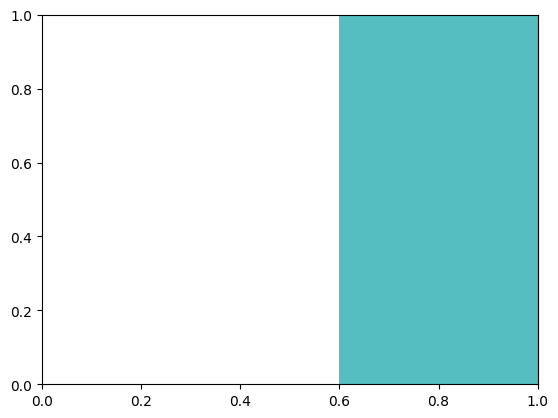

In [71]:
for i, data in enumerate(heap_sort(dataset)):
    update_chart(data, i+1, xlim=[0, n+1], ylim=[0, n+.5], folder_name="Sortieralgorithmen/Heap_sort", name="Heap Sort")

### Radix Sort

Radix Sort sortiert Zahlen nach ihren einzelnen Ziffern, beginnend mit der niedrigsten Stelle (Einerstelle).
* **Funktionsweise**: In jedem Durchlauf werden die Zahlen in "Buckets" einsortiert, je nachdem, welche Ziffer sie an der aktuellen Stelle haben. Dann werden die Buckets in der richtigen Reihenfolge wieder zusammengefügt. Dieser Vorgang wird für jede Stelle wiederholt, bis alle Stellen sortiert sind.
* **Zeitkomplexität**: $O(nk)$, wobei n die Anzahl der Elemente und k die maximale Anzahl von Stellen ist.
* **Besonderheiten**: Radix Sort ist effizient für ganze Zahlen mit begrenzter Stellenanzahl. Er ist kein vergleichsbasierter Algorithmus, sondern nutzt die Verteilung der Ziffern.

In [54]:
# Erzeuge einen zufälligen Datensatz
n=50
dataset = random.sample(range(1, n+1), n)

In [55]:
def flatten_and_fill(buckets, arr_length):
    """
    Flacht die Buckets ab und füllt fehlende Werte mit Nullen auf.
    """
    flattened = [item for sublist in buckets for item in sublist]
    return flattened + [0] * (arr_length - len(flattened))

def radix_sort(arr):
    """
    Implementiert den Radix Sort Algorithmus und gibt eine Liste von Arrays zurück,
    die jeden einzelnen Sortierschritt darstellen.
    """
    max_value = max(arr)
    exp = 1
    snapshots = [arr.copy()]  # Initialer Zustand

    while max_value // exp > 0:
        buckets = [[] for _ in range(10)]
        for num in arr:
            digit = (num // exp) % 10
            buckets[digit].append(num)
            snapshots.append(flatten_and_fill(buckets, len(arr)))  # Save the snapshot

        arr = [num for bucket in buckets for num in bucket]
        exp *= 10

    return snapshots

In [56]:
for i, data in enumerate(radix_sort(dataset)):
    update_chart(data, i+1,  xlim=[0, n+1], ylim=[0, n+.5], folder_name="Sortieralgorithmen/radix_sort", name="Radix Sort")

### Bogo Sort

Bogo Sort ist ein ineffizienter und nicht-deterministischer Sortieralgorithmus. Er funktioniert, indem er das Array zufällig mischt und dann überprüft, ob es sortiert ist. Dieser Vorgang wird wiederholt, bis das Array zufällig in die richtige Reihenfolge gebracht wird. Aus diesem Grund habe ich die größe des Datensatzes verkleinert.
* **Funktionsweise**: Der Algorithmus mischt das Array wiederholt, bis es zufällig sortiert ist. Es gibt keine Garantie dafür, wie lange dies dauern wird. Im schlimmsten Fall kann es unendlich lange dauern.
* **Zeitkomplexität**: Im Durchschnitt und im schlimmsten Fall unendlich, da keine Garantie für eine Beendigung besteht.
* **Besonderheiten**: Bogo Sort ist extrem ineffizient und unpraktisch. Er dient nur als humorvolles Beispiel für einen schlechten Algorithmus.

In [57]:
# Erzeuge einen zufälligen Datensatz
n = 5
dataset = random.sample(range(1, n+1), n)
print(dataset)

[5, 4, 1, 3, 2]


In [58]:
import random

def bogo_sort(data):
    steps = []  # Initialisiere eine Liste, um die Schritte des Sortierprozesses zu speichern

    # Wiederhole den Prozess, bis das Array sortiert ist
    while not all(data[i] <= data[i+1] for i in range(len(data)-1)):
        steps.append(list(data))  # Füge den aktuellen Zustand des Arrays zu den Schritten hinzu
        random.shuffle(data)  # Mische das Array zufällig

    steps.append(list(data))  # Füge das endgültig sortierte Array zu den Schritten hinzu

    return steps  # Gebe die Liste der Schritte zurück

In [59]:
for i, data in enumerate(bogo_sort(dataset)):
    update_chart(data, i+1,  xlim=[0, n+1], ylim=[0, n+.5], folder_name="Sortieralgorithmen/bogo_sort", name="Bogo Sort")

### Sleep Sort

Sleep Sort ist ein unkonventioneller und ineffizienter Sortieralgorithmus, der auf der Idee basiert, dass jeder Thread für eine Zeit "schläft", die proportional zum Wert des Elements ist. Auch hier verzichte darauf, einen großen Datensatz zu verwenden.
* **Funktionsweise**: Für jedes Element im Array wird ein Thread gestartet. Jeder Thread schläft für eine Zeit, die dem Wert des Elements entspricht. Wenn ein Thread aufwacht, gibt er sein Element aus. Da die Threads mit kleineren Werten zuerst aufwachen, werden die Elemente in sortierter Reihenfolge ausgegeben.
* **Zeitkomplexität**: $O(n + max(arr))$, wobei $max(arr)$ das größte Element im Array ist.
* **Besonderheiten**: Sleep Sort ist nicht deterministisch, da die Reihenfolge der Ausgabe bei gleichen Elementen variieren kann. Er ist ineffizient und dient eher als Kuriosität.

In [60]:
# Erzeuge einen zufälligen Datensatz
n = 10
dataset = random.sample(range(1, n+1), n)

In [63]:
import time
import threading

def sleep_sort(data):
    
    sorted_data = [0] * len(data)  # Initialize sorted_data with zeros
    all_steps = []  # Initialize the list to store all steps
    index = 0  # Initialize index
    
    def sleep_func(x):
        nonlocal index  # Declare index as nonlocal so it can be modified inside this function
        time.sleep(x/10)
        sorted_data[index] = x  # Insert the element at the current index
        index += 1  # Increment the index
        all_steps.append(list(sorted_data))  # Append the current state of sorted_data to all_steps
    
    threads = []
    for num in data:
        t = threading.Thread(target=sleep_func, args=(num,))
        threads.append(t)
        t.start()
    
    for t in threads:
        t.join()
    
    return all_steps  # Return the list of all steps

In [65]:
for i, data in enumerate(sleep_sort(dataset)):
    update_chart(data, i+1, xlim=[0, n+1], ylim=[0, n+.5], folder_name="Sortieralgorithmen/sleep_sort", name="Sleep Sort")

Es gibt noch viele weitere Sortieralgorithmen. Und den einen oder anderen werde ich vielleicht noch ergänzen.

## Gifs erstellen

In [66]:
import os
import imageio

In [67]:
from PIL import Image
import os

def calculate_duration(num_images, min_images=25, min_duration=50, max_duration=500, max_images=5000):
    if num_images < min_images:  # Wenn die Anzahl der Bilder kleiner als min_images ist
        duration = max_duration
    elif num_images >= max_images:  # Wenn die Anzahl der Bilder größer oder gleich max_images ist
        duration = min_duration
    else:  # Wenn die Anzahl der Bilder zwischen min_images und max_images liegt
        slope = (min_duration - max_duration) / (max_images - min_duration)
        duration = max_duration + slope * (num_images - min_duration)
    return duration  # Gib die berechnete Dauer zurück

def create_gif_from_pngs(folder_path, output_path):
    # Erstelle eine Liste von Bildern aus den PNG-Dateien im angegebenen Ordner
    images = [Image.open(os.path.join(folder_path, filename)) for filename in sorted(os.listdir(folder_path)) if filename.endswith(".png")]

    # Berechne die Dauer für das GIF
    duration = calculate_duration(len(images), min_images=5, min_duration=100, max_duration=200, max_images=5000)

    # Speichere die Bilder als animiertes GIF
    images[0].save(output_path, save_all=True, append_images=images[1:], loop=0, duration=duration)

In [68]:
folder_path = "Sortieralgorithmen"
# Erstelle eine Liste von Ordnern im angegebenen Pfad
folder_list = [folder for folder in os.listdir(folder_path) if os.path.isdir(os.path.join(folder_path, folder))]

for folder in folder_list:
    # Erstelle das GIF für jeden Ordner und speichere es im gleichen Ordner
    create_gif_from_pngs(os.path.join(folder_path, folder), os.path.join(folder_path, f"{folder}.gif"))

UnidentifiedImageError: cannot identify image file 'Sortieralgorithmen\\bubble_sort\\Bubble Sort_Iteration_0099.png'